In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PATH = "/content/drive/MyDrive/cat_dogs_small"

### Training the Models

In [4]:
# importing libraries
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [5]:
# tensorflow version
print(tf.__version__)

2.4.1


In [ ]:
# Instantiating a small ConvNet
model = keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=1))

In [ ]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
# Compiling the model

loss = keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = optimizers.RMSprop(learning_rate=1e-4)
metrics = ['accuracy']

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics
)

In [ ]:
# Loading the data

train_generator = ImageDataGenerator(rescale=1.0/255)
val_generator = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_batches = train_generator.flow_from_directory(
    directory=PATH + '/train',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20
)

val_batches = val_generator.flow_from_directory(
    directory=PATH + '/validation',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20,
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Lets see the output of the training batches

for data_batch, label_batch in train_batches:
  print(f"Data Batch Shape: {data_batch.shape}")
  print(f"Label Batch Shape: {label_batch.shape}")
  break  # break because we only want first batch

Data Batch Shape: (20, 150, 150, 3)
Label Batch Shape: (20,)


In [ ]:
# training the model
history = model.fit(
    train_batches,
    validation_data=val_batches,
    epochs=30,
    verbose=2
)

Epoch 1/30
100/100 - 342s - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/30
100/100 - 11s - loss: 0.6913 - accuracy: 0.5000 - val_loss: 0.6862 - val_accuracy: 0.5000
Epoch 3/30
100/100 - 11s - loss: 0.6817 - accuracy: 0.5000 - val_loss: 0.6675 - val_accuracy: 0.5040
Epoch 4/30
100/100 - 11s - loss: 0.6662 - accuracy: 0.5300 - val_loss: 0.6514 - val_accuracy: 0.5450
Epoch 5/30
100/100 - 11s - loss: 0.6594 - accuracy: 0.5730 - val_loss: 0.6564 - val_accuracy: 0.6250
Epoch 6/30
100/100 - 11s - loss: 0.6460 - accuracy: 0.5875 - val_loss: 0.6408 - val_accuracy: 0.6340
Epoch 7/30
100/100 - 11s - loss: 0.6384 - accuracy: 0.6025 - val_loss: 0.6528 - val_accuracy: 0.6660
Epoch 8/30
100/100 - 11s - loss: 0.6301 - accuracy: 0.6155 - val_loss: 0.6126 - val_accuracy: 0.6410
Epoch 9/30
100/100 - 11s - loss: 0.6224 - accuracy: 0.6110 - val_loss: 0.6022 - val_accuracy: 0.6460
Epoch 10/30
100/100 - 11s - loss: 0.6067 - accuracy: 0.6460 - val_loss: 0.6442 - val_accur

In [ ]:
# saving the model
model.save('cats_dogs_classifier_1.h5')

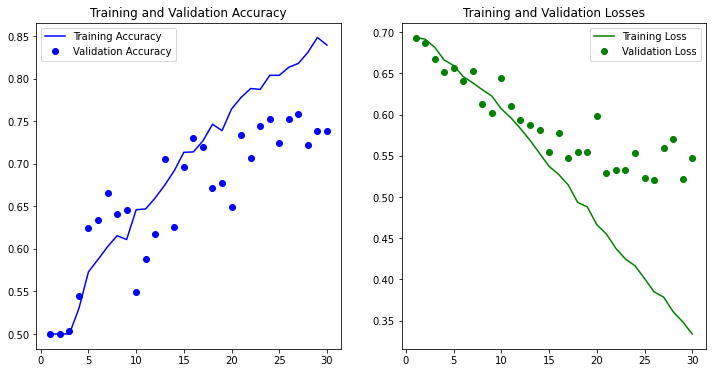

In [ ]:
# Plotting the model's loss and accuracy

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'go', label='Validation Loss')
plt.title("Training and Validation Losses")
plt.legend()

plt.show();

The Figures above are characteristic of overfitting.

In [ ]:
# Creating another model using Dropout Layer and Data Augmentation

In [ ]:
model2 = models.Sequential()

In [ ]:
# adding layers

model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), input_shape=(150, 150, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2,2)))
model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))
model2.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model2.add(layers.MaxPool2D(pool_size=(2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(rate=0.3))
model2.add(layers.Dense(units=512, activation='relu'))
model2.add(layers.Dense(units=1))

In [ ]:
# Compiling the model

optim = optimizers.RMSprop(learning_rate=1e-4)
loss = keras.losses.BinaryCrossentropy(from_logits=True)
metrics = ['accuracy']

model2.compile(
    optimizer=optim,
    loss=loss,
    metrics=metrics
)

In [ ]:
# model summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [ ]:
# Data Generators

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
# Creating batches

train_batches = train_datagen.flow_from_directory(
    directory=PATH + '/train',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32
)

validation_batches = val_datagen.flow_from_directory(
    directory=PATH + '/validation',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=32
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# now training the model
history = model2.fit(
    train_batches,
    validation_data=validation_batches,
    epochs=30,
    verbose=2
)

Epoch 1/30
63/63 - 21s - loss: 0.6946 - accuracy: 0.4990 - val_loss: 0.6866 - val_accuracy: 0.5330
Epoch 2/30
63/63 - 19s - loss: 0.6759 - accuracy: 0.5365 - val_loss: 0.6707 - val_accuracy: 0.6190
Epoch 3/30
63/63 - 19s - loss: 0.6756 - accuracy: 0.5515 - val_loss: 0.6510 - val_accuracy: 0.6060
Epoch 4/30
63/63 - 19s - loss: 0.6596 - accuracy: 0.5775 - val_loss: 0.6355 - val_accuracy: 0.6160
Epoch 5/30
63/63 - 19s - loss: 0.6514 - accuracy: 0.5850 - val_loss: 0.6316 - val_accuracy: 0.5820
Epoch 6/30
63/63 - 19s - loss: 0.6475 - accuracy: 0.5970 - val_loss: 0.6107 - val_accuracy: 0.6270
Epoch 7/30
63/63 - 19s - loss: 0.6305 - accuracy: 0.5985 - val_loss: 0.5972 - val_accuracy: 0.6580
Epoch 8/30
63/63 - 19s - loss: 0.6177 - accuracy: 0.6260 - val_loss: 0.7062 - val_accuracy: 0.6540
Epoch 9/30
63/63 - 19s - loss: 0.6089 - accuracy: 0.6400 - val_loss: 0.5901 - val_accuracy: 0.6210
Epoch 10/30
63/63 - 19s - loss: 0.5955 - accuracy: 0.6485 - val_loss: 0.5943 - val_accuracy: 0.6180
Epoch 11/

In [ ]:
# saving the model

model2.save('cats_dogs_classifier_2.h5')

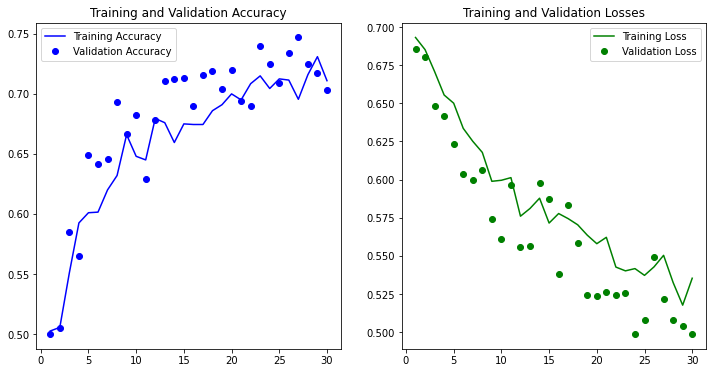

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'go', label='Validation Loss')
plt.title("Training and Validation Losses")
plt.legend()

plt.show();

In [6]:
# using a pretrained ConvNet
from tensorflow.keras.applications import VGG16

In [7]:
# creating the model
conv_base = VGG16(
    include_top=False,
    input_shape=(150, 150, 3),
)

58892288/58889256 [==============================] - 1s 0us/step


In [8]:
# summary of the model till now
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [9]:
# Adding a densely connected classifier on top of vgg16
model3 = models.Sequential()

In [10]:
model3.add(conv_base)
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1))

In [11]:
# Summary of the model
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Since vgg16 is already trained, we will freeze it now
print(f"Before Freezing: {len(model3.trainable_weights)}")

conv_base.trainable = False  # freezing the vgg16 model
print(f"After Freezing: {len(model3.trainable_weights)}")

Before Freezing: 30
After Freezing: 4


In [13]:
# Compiling the model
optimizer = optimizers.RMSprop(learning_rate=2e-5)
loss = keras.losses.BinaryCrossentropy(from_logits=True)
metrics = ['accuracy']

model3.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metrics,
)

In [14]:
# loading in the data

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [15]:
# loading in the batches

train_batches = train_datagen.flow_from_directory(
    directory = PATH + '/train',
    target_size=(150, 150),
    class_mode='binary',
    batch_size=20
)

val_batches = val_datagen.flow_from_directory(
    directory=PATH + '/validation',
    target_size=(150,150),
    class_mode='binary',
    batch_size=20
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
# fitting the model

history = model3.fit(
    train_batches,
    validation_data=val_batches,
    epochs=30,
    verbose=2
)

Epoch 1/30
100/100 - 587s - loss: 0.5979 - accuracy: 0.6400 - val_loss: 0.4626 - val_accuracy: 0.7810
Epoch 2/30
100/100 - 21s - loss: 0.4920 - accuracy: 0.7515 - val_loss: 0.3774 - val_accuracy: 0.8340
Epoch 3/30
100/100 - 20s - loss: 0.4495 - accuracy: 0.7795 - val_loss: 0.3362 - val_accuracy: 0.8360
Epoch 4/30
100/100 - 20s - loss: 0.4027 - accuracy: 0.8085 - val_loss: 0.3102 - val_accuracy: 0.8540
Epoch 5/30
100/100 - 20s - loss: 0.3785 - accuracy: 0.8080 - val_loss: 0.3160 - val_accuracy: 0.8790
Epoch 6/30
100/100 - 20s - loss: 0.3842 - accuracy: 0.8110 - val_loss: 0.2854 - val_accuracy: 0.8550
Epoch 7/30
100/100 - 20s - loss: 0.3621 - accuracy: 0.8275 - val_loss: 0.2700 - val_accuracy: 0.8780
Epoch 8/30
100/100 - 20s - loss: 0.3469 - accuracy: 0.8360 - val_loss: 0.2671 - val_accuracy: 0.8830
Epoch 9/30
100/100 - 20s - loss: 0.3420 - accuracy: 0.8350 - val_loss: 0.2670 - val_accuracy: 0.8700
Epoch 10/30
100/100 - 20s - loss: 0.3300 - accuracy: 0.8410 - val_loss: 0.2573 - val_accur

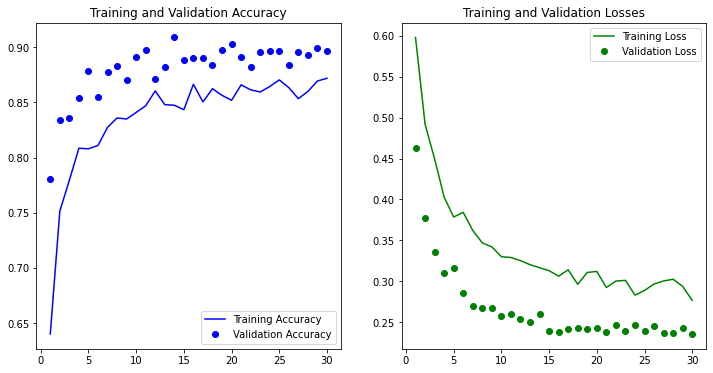

In [17]:
# Plotting the results
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'go', label='Validation Loss')
plt.title("Training and Validation Losses")
plt.legend()

plt.show();

We can fine tune the model further by Fine Tuning, ie. we will unfreeze some of the top frozen layers which helps the model to learn features relevant to the problem at hand.

In [18]:
# Lets look at the conv_base model once more
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Out of the above layers, we will train the last three convolutional layers, block5_conv1, block5_conv2, block5_conv3 which means we will train the Block5.

In [19]:
# Lets unfreeze the last three layers

conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [20]:
[layer.name for layer in conv_base.layers if layer.trainable == True]

['block5_conv1', 'block5_conv2', 'block5_conv3', 'block5_pool']

In [21]:
# Since we have changed trainable values of some layers, we need to compile again

model3.compile(
    optimizer = optimizers.RMSprop(learning_rate=1e-5),
    # we are choosing a small learning rate because we want to manage the magnitude of change made to these 3 layers
    loss = keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [22]:
# Lets train the model

history = model3.fit(
    train_batches,
    validation_data = val_batches,
    epochs=30,
    verbose=2
)

Epoch 1/30
100/100 - 22s - loss: 0.2993 - accuracy: 0.8595 - val_loss: 0.2371 - val_accuracy: 0.8870
Epoch 2/30
100/100 - 20s - loss: 0.2629 - accuracy: 0.8755 - val_loss: 0.2006 - val_accuracy: 0.9110
Epoch 3/30
100/100 - 20s - loss: 0.2313 - accuracy: 0.8995 - val_loss: 0.1902 - val_accuracy: 0.9150
Epoch 4/30
100/100 - 20s - loss: 0.2078 - accuracy: 0.9120 - val_loss: 0.2008 - val_accuracy: 0.9260
Epoch 5/30
100/100 - 20s - loss: 0.2105 - accuracy: 0.9115 - val_loss: 0.1936 - val_accuracy: 0.9240
Epoch 6/30
100/100 - 20s - loss: 0.2090 - accuracy: 0.9095 - val_loss: 0.1884 - val_accuracy: 0.9190
Epoch 7/30
100/100 - 20s - loss: 0.1901 - accuracy: 0.9230 - val_loss: 0.1876 - val_accuracy: 0.9230
Epoch 8/30
100/100 - 20s - loss: 0.1652 - accuracy: 0.9235 - val_loss: 0.1808 - val_accuracy: 0.9270
Epoch 9/30
100/100 - 20s - loss: 0.1578 - accuracy: 0.9295 - val_loss: 0.1947 - val_accuracy: 0.9240
Epoch 10/30
100/100 - 21s - loss: 0.1679 - accuracy: 0.9260 - val_loss: 0.1979 - val_accura

In [ ]:
# plotting the model results
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'bo', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'go', label='Validation Loss')
plt.title("Training and Validation Losses")
plt.legend()

plt.show();

In [23]:
# saving the model
model3.save('cats_dogs_classifier_3.h5')

### Visualizing How ConvNets Learn

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# importing the second classification model
model = load_model("cats_dogs_classifier_2.h5")

In [7]:
# having a look at the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [8]:
PATH

'/content/drive/MyDrive/cat_dogs_small'

In [16]:
img_path = PATH + '/test/cat/cat.1700.jpg'

In [19]:
# loading the image

img = image.load_img(img_path, target_size=(150, 150))

In [20]:
# converting image to tensor 
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.0

In [22]:
img_tensor.shape

(1, 150, 150, 3)

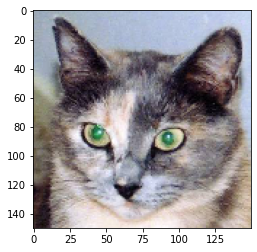

In [28]:
# displaying the image
plt.imshow(img_tensor[0])
plt.show();

In [29]:
# to look at the outputs after evrey layer, we will use the Model class of Keras which allows us to do so unlike Sequential class

In [30]:
model.layers

In [31]:
# we will need output after each conv layer, therefor lets get the first 8 layers outputs
output_layers = [layer.output for layer in model.layers[:8]]

In [32]:
# lets create the model
activation_model = models.Model(inputs=model.input, outputs=output_layers)

In [33]:
# getting the outputs 
activations = activation_model.predict(img_tensor)

In [36]:
# lets look at the outputs:
print(type(activations))
print(len(activations))

<class 'list'>
8


In [39]:
# first layer output 
first_layer_output = activations[0]
print(type(first_layer_output))
print(len(first_layer_output))
print(first_layer_output.shape)

<class 'numpy.ndarray'>
1
(1, 148, 148, 32)


As we can see above (1, 148, 148, 32) -> there are total of 32 channels of 148*148 each

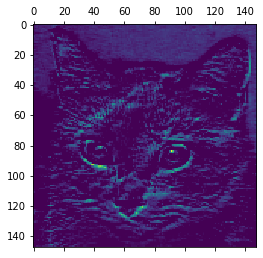

In [48]:
# having a look at the fourth channel
plt.matshow(first_layer_output[0, :, :, 4], cmap='viridis')

32 Channels of First Activation Layer


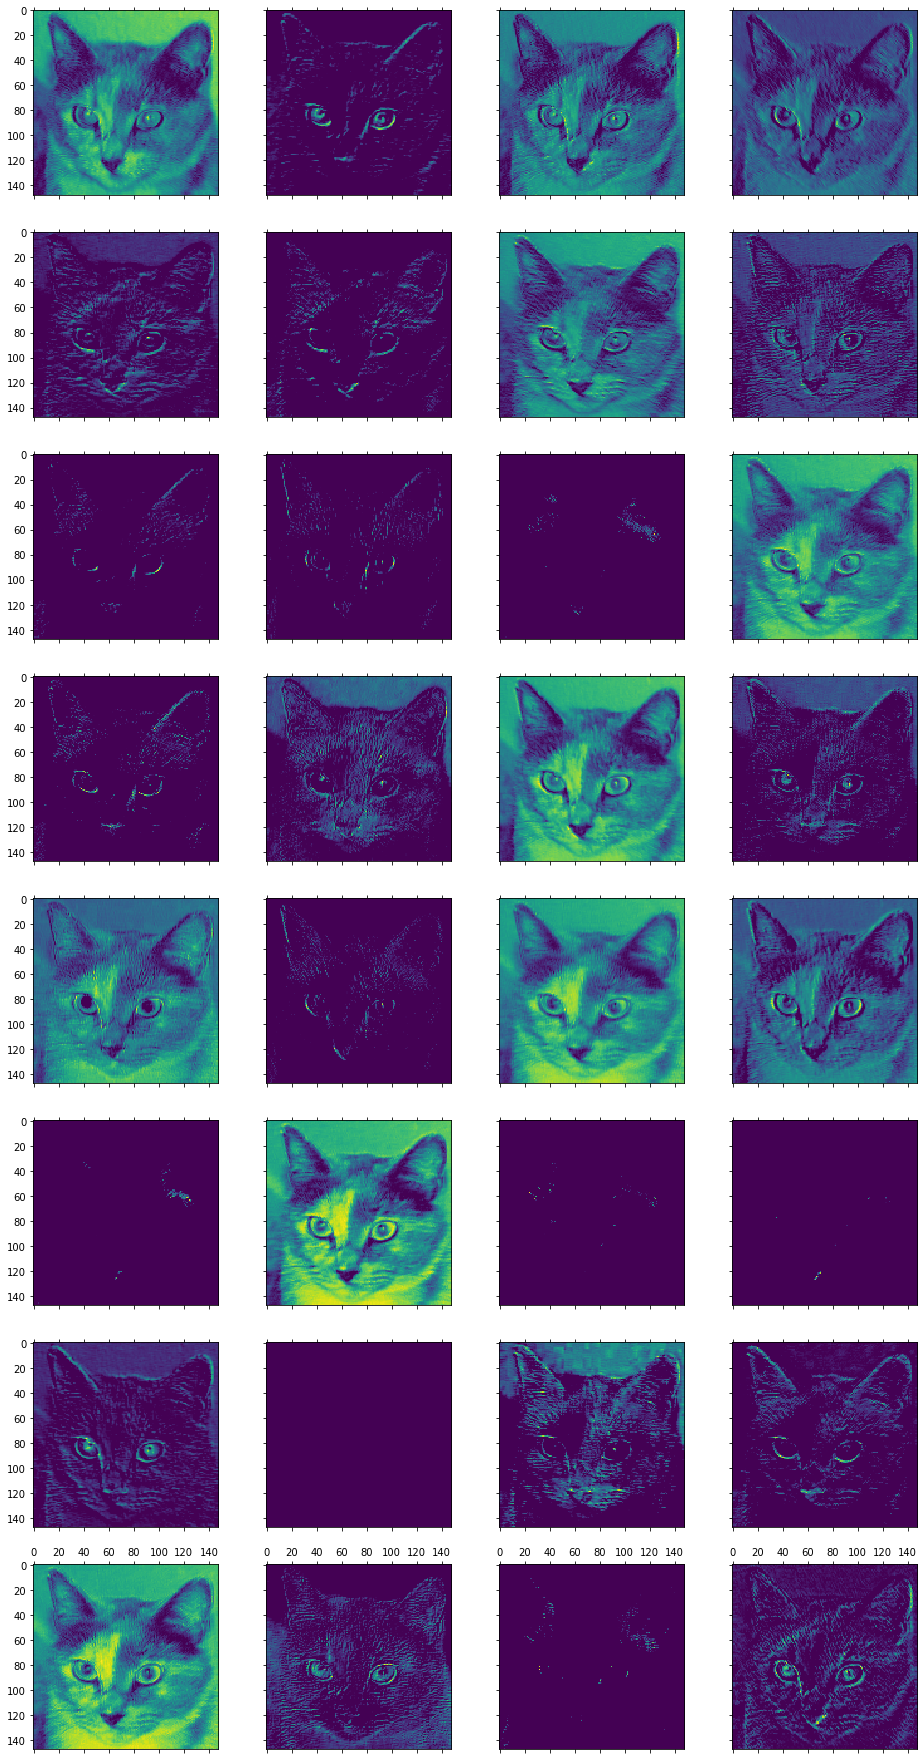

In [62]:
# Having a look at all the 32 channels of the first output layer
print("32 Channels of First Activation Layer")
fig, axs = plt.subplots(8, 4, figsize=(16, 32), sharex=True, sharey=True, )
img_counter = 0
for i in range(8):
  axs[i, 0].matshow(activations[0][0, :, :, img_counter], cmap='viridis')
  axs[i, 1].matshow(activations[0][0, :, :, img_counter+1], cmap='viridis')
  axs[i, 2].matshow(activations[0][0, :, :, img_counter+2], cmap='viridis')
  axs[i, 3].matshow(activations[0][0, :, :, img_counter+3], cmap='viridis')
  img_counter += 4